## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1. Linear regression model

## Load regression data

In [37]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

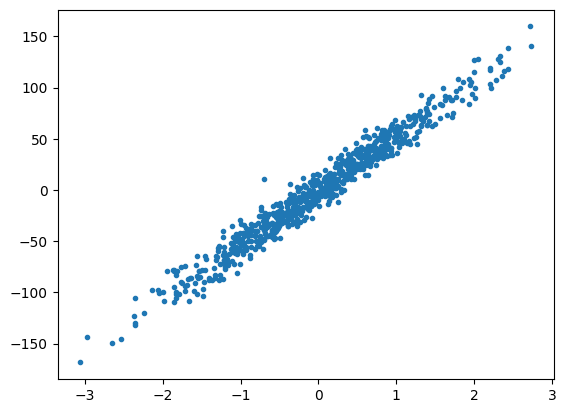

In [38]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [39]:
#parameter
training_size = x_train.shape[0]
y_train = y_train.reshape(750, 1)
y_test = y_test.reshape(250, 1)

In [56]:
#y = mX + q

def mean_square_error(y_truth: np.ndarray, y_pred: np.ndarray) -> float:
        return np.square(y_truth - y_pred).mean()


class LinearRegression:
    def __init__(self, iteration = 200, learning_rate = 0.1) -> None:
        self.rng = np.random.default_rng()
        self.iteration = iteration
        self.learning_rate = learning_rate
        self.m, self.q = self.rng.standard_normal(2)
        self.loss = []

    def gradient_descent(self):
        for _ in range(self.iteration):
            # y = mX + q
            y_pred = self.m * x_train + self.q
            error = y_train - y_pred

            self.loss.append(mean_square_error(y_train, y_pred))

            gradient_m = np.squeeze((-1 / training_size) * np.dot(x_train.T, error))
            gradient_q = (-1 / training_size) * np.sum(error)

            self.m = self.m - self.learning_rate * gradient_m
            self.q = self.q - self.learning_rate * gradient_q


    def predict(self, x_test: np.ndarray) -> np.ndarray:
        return self.m * x_test + self.q

    def draw_learning_curve(self):
        plt.title("Learning Curve")
        plt.xlabel("iteration")
        plt.ylabel("loss")
        plt.plot(range(self.iteration), self.loss)
        plt.plot()


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

weights: 52.74354027903979, intercepts: -0.33375893411863417
Mean of Square Error: 110.4381919918838


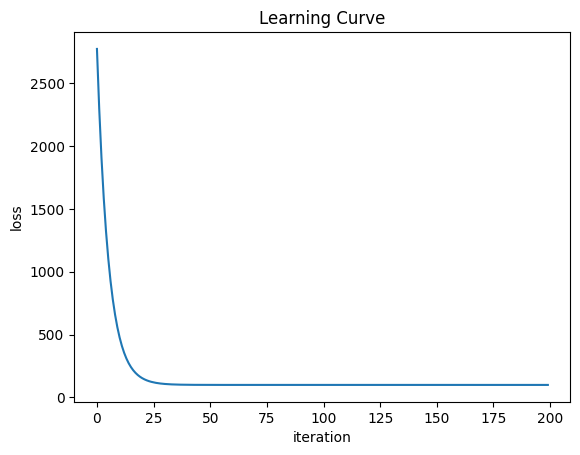

In [57]:
model = LinearRegression()
model.gradient_descent()
y_pred = model.predict(x_test)
model.draw_learning_curve()
print(f"weights: {model.m}, intercepts: {model.q}")
print(f"Mean of Square Error: {mean_square_error(y_test, y_pred)}")

# Part 2. Logistic regreesion model

## Load classification data

In [62]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)
y_train = y_train.reshape(750, 1)
y_test = y_test.reshape(250, 1)

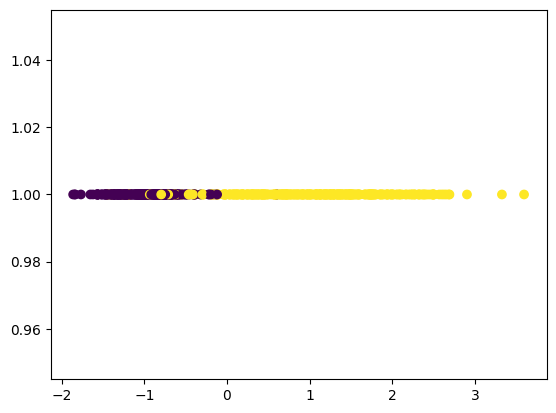

In [63]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [64]:
from numpy import ndarray

class LogisticRegression:

    def __init__(self, learning_rate = 0.1, num_iterations = 2000, rng = np.random.default_rng(), size = 750) -> None:
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.size = size
        self.rng = rng
        self.w = 0
        self.b = 0
    
    def initialize_weight(self) -> None:
        self.w = self.rng.standard_normal()
        self.b = self.rng.standard_normal()

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))

    def hypothesis(self, X: np.ndarray) -> np.ndarray:
        return self.sigmoid(self.w * X + self.b)

    def cost(self, H: np.ndarray, Y: np.ndarray) -> float:
        cost = -np.sum(Y * np.log(H) + (1 - Y) * np.log((1 - H))) / self.size
        return cost

    def gradient_descent(self, X: np.ndarray, Y: np.ndarray) -> list[float]:
        cost = []
        for _ in range(self.num_iterations):
            H = self.hypothesis(X)
            cost.append(self.cost(H, Y))

            gradient_w = np.dot(X.T, (H - Y)) / self.size
            gradient_b = np.sum(H - Y) / self.size

            self.w = self.w - self.learning_rate * np.squeeze(gradient_w)
            self.b = self.b - self.learning_rate * np.squeeze(gradient_b)

        return cost

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Y_prediction = np.zeros((X.shape[0], X.shape[1]))
        H = self.hypothesis(X)

        # for i in range(H.shape[0]):
        #     Y_prediction[i] = 1 if H[i] >= 0.5 else 0

        return H

    def draw_learning_curve(self, cost):
        plt.title("Learning Curve")
        plt.xlabel("iteration")
        plt.ylabel("loss")
        plt.plot(range(self.num_iterations), cost)

weights: 4.3884609839523, intercepts: 1.4151258754692948
Cross Entropy Error: 0.06105964509571639


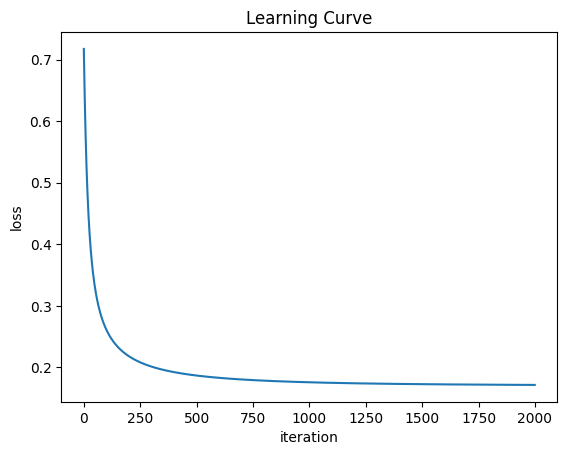

In [65]:
model = LogisticRegression()
model.initialize_weight()
cost = model.gradient_descent(x_train, y_train)
Y_pred = model.predict(x_test)
error = model.cost(Y_pred, y_test)
print(f"weights: {model.w}, intercepts: {model.b}")
print(f"Cross Entropy Error: {error}")
model.draw_learning_curve(cost)